In [81]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress


In [39]:


# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset="ZIP")
crime_data.isna().sum()



INC NUMBER                 0
OCCURRED ON              419
OCCURRED TO           207746
UCR CRIME CATEGORY         0
100 BLOCK ADDR             0
ZIP                        0
PREMISE TYPE            3915
GRID                    1557
dtype: int64

In [40]:
# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Display the dataframe
crime_data.head()


,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
1,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19


In [42]:
crimes=crime_data["UCR CRIME CATEGORY"].unique()
crimes

array(['RAPE', 'LARCENY-THEFT', 'MOTOR VEHICLE THEFT', 'DRUG OFFENSE',
       'BURGLARY', 'AGGRAVATED ASSAULT',
       'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'ROBBERY', 'ARSON'],
      dtype=object)

In [43]:
crime_data["UCR CRIME CATEGORY"].value_counts()


UCR CRIME CATEGORY
LARCENY-THEFT                            292040
BURGLARY                                  71977
MOTOR VEHICLE THEFT                       66507
AGGRAVATED ASSAULT                        54108
DRUG OFFENSE                              52605
ROBBERY                                   22492
RAPE                                       9020
ARSON                                      5530
MURDER AND NON-NEGLIGENT MANSLAUGHTER      1480
Name: count, dtype: int64

In [44]:
crime_vs_time=crime_data[["UCR CRIME CATEGORY","OCCURRED TO"]]
#crime_vs_time=crime_vs_time.set_index("UCR CRIME CATEGORY")
clean_crime_vs_time= crime_vs_time.dropna()
clean_crime_vs_time["OCCURRED TO_datetime"]=pd.to_datetime(clean_crime_vs_time["OCCURRED TO"])
clean_crime_vs_time=clean_crime_vs_time.drop(columns=["OCCURRED TO"])

clean_crime_vs_time


C:\Users\Mel\AppData\Local\Temp\ipykernel_30140\1805508594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_crime_vs_time["OCCURRED TO_datetime"]=pd.to_datetime(clean_crime_vs_time["OCCURRED TO"])


,UCR CRIME CATEGORY,OCCURRED TO_datetime
0,RAPE,2016-03-31 00:00:00
2,LARCENY-THEFT,2015-11-11 09:30:00
3,LARCENY-THEFT,2016-03-22 00:36:00
4,MOTOR VEHICLE THEFT,2016-01-09 00:00:00
5,DRUG OFFENSE,2015-11-01 15:21:00
...,...,...
575760,MOTOR VEHICLE THEFT,2025-01-16 22:35:00
575762,BURGLARY,2025-01-17 09:25:00
575763,MOTOR VEHICLE THEFT,2025-01-17 06:00:00
575764,LARCENY-THEFT,2025-01-16 23:02:00


In [45]:
clean_crime_vs_time["OCCURRED TO_date"]= clean_crime_vs_time["OCCURRED TO_datetime"].dt.date
clean_crime_vs_time["OCCURRED TO_time"]=clean_crime_vs_time["OCCURRED TO_datetime"].dt.hour
clean_crime_vs_time

,UCR CRIME CATEGORY,OCCURRED TO_datetime,OCCURRED TO_date,OCCURRED TO_time
0,RAPE,2016-03-31 00:00:00,2016-03-31,0
2,LARCENY-THEFT,2015-11-11 09:30:00,2015-11-11,9
3,LARCENY-THEFT,2016-03-22 00:36:00,2016-03-22,0
4,MOTOR VEHICLE THEFT,2016-01-09 00:00:00,2016-01-09,0
5,DRUG OFFENSE,2015-11-01 15:21:00,2015-11-01,15
...,...,...,...,...
575760,MOTOR VEHICLE THEFT,2025-01-16 22:35:00,2025-01-16,22
575762,BURGLARY,2025-01-17 09:25:00,2025-01-17,9
575763,MOTOR VEHICLE THEFT,2025-01-17 06:00:00,2025-01-17,6
575764,LARCENY-THEFT,2025-01-16 23:02:00,2025-01-16,23


In [65]:
#HOUR OF THE DAY THE MOST CRIMES HAPPEND from 2015 to 2025
time=clean_crime_vs_time.groupby("OCCURRED TO_time").count()
time=time.drop(columns=['OCCURRED TO_datetime','OCCURRED TO_date'], errors='ignore')
time.head(24)

,UCR CRIME CATEGORY
OCCURRED TO_time,
0,18538
1,7040
2,7190
3,7939
4,10085
5,14715
6,20494
7,22685
8,21317


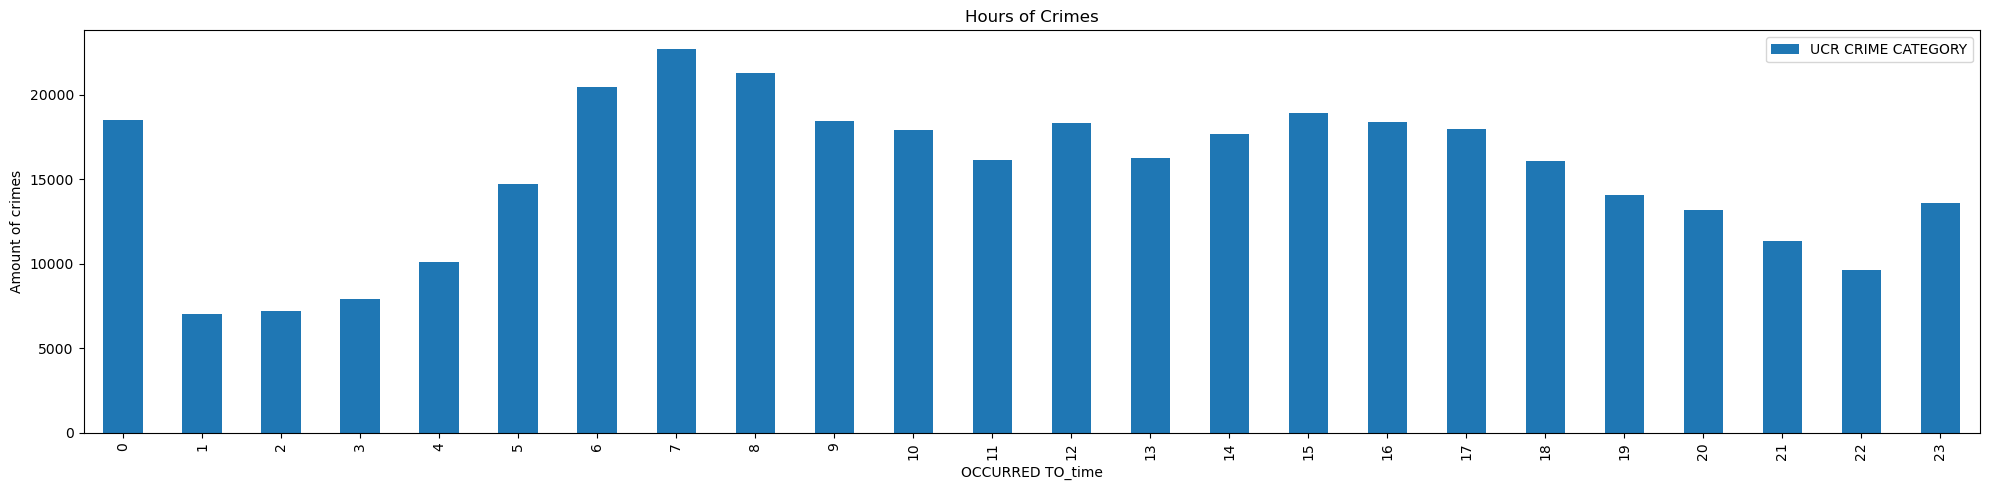

In [50]:
time.plot(kind="bar", figsize=(20,5))

# Set a title for the chart
plt.title("Hours of Crimes")
plt.ylabel("Amount of crimes")

plt.tight_layout()
plt.show()

In [66]:
time=time.reset_index().head(10)
# Filter top 10 hours with the most crimes
top_10 = time[time['UCR CRIME CATEGORY'] >= 10000].sort_values(by='UCR CRIME CATEGORY', ascending=False).head(10)
top_10

,OCCURRED TO_time,UCR CRIME CATEGORY
7,7,22685
8,8,21317
6,6,20494
0,0,18538
9,9,18426
5,5,14715
4,4,10085


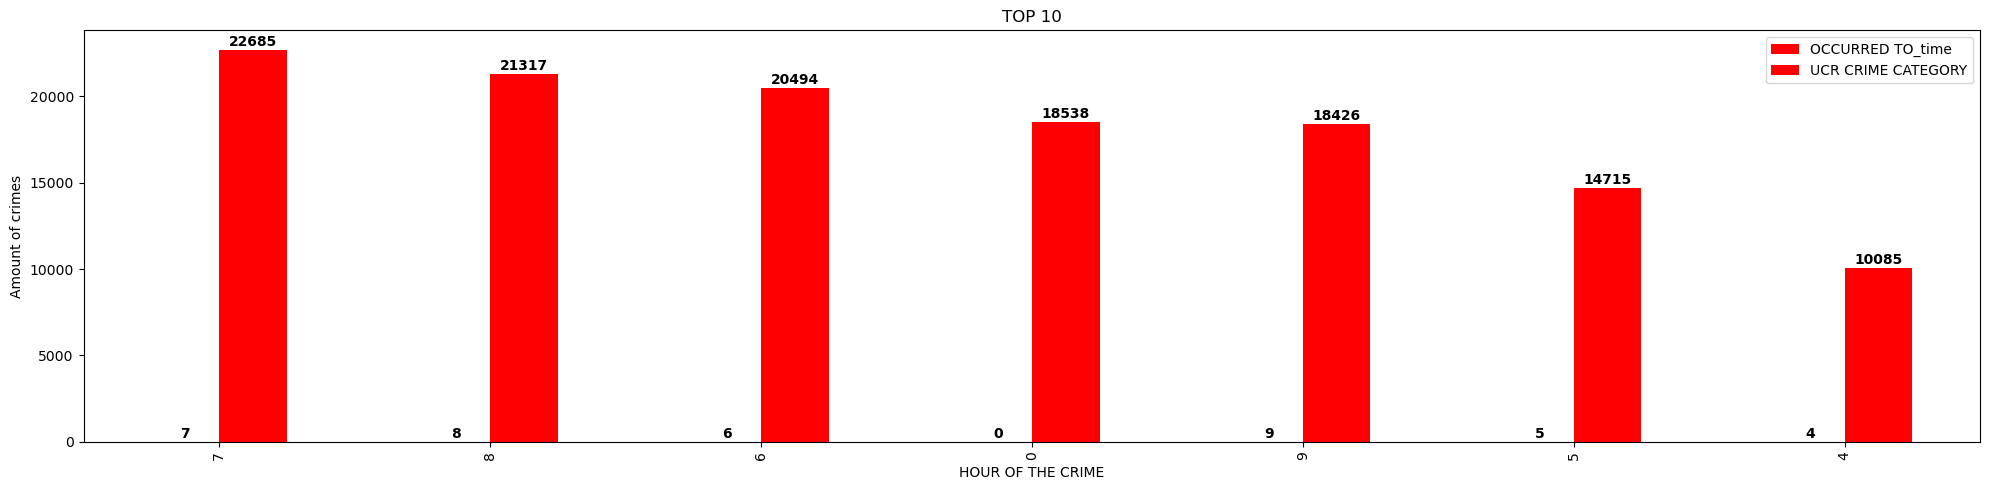

In [73]:
ax = top_10.plot(kind="bar", color="red", figsize=(20, 5))

# Loop through each bar and add text above it
# Use ax.patches to get the bars
for i, rect in enumerate(ax.patches):  
   # Get the height of each bar 
    height = rect.get_height()  
    ax.text(rect.get_x() + rect.get_width() / 2, height + 50, str(int(height)), ha='center', va='bottom', fontweight='bold')

# Set a title for the chart
plt.title("TOP 10")
plt.xlabel("HOUR OF THE CRIME")
plt.ylabel("Amount of crimes")

plt.tight_layout()
plt.show()

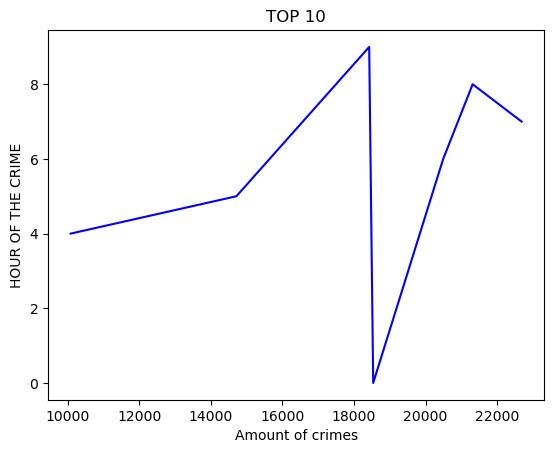

In [100]:

x_values=top_10["OCCURRED TO_time"]
y_values=top_10["UCR CRIME CATEGORY"]

# sorted_indices = x_values.argsort()  # Sort the indices based on x_values
# x_sorted = x_values.iloc[sorted_indices]  # Apply sorted indices to x_values
# y_sorted = y_values.iloc[sorted_indices]
# plt.scatter(x_values,y_values)


# Add labels
plt.title("TOP 10")
plt.xlabel("Amount of crimes")
plt.ylabel("HOUR OF THE CRIME")
plt.plot(y_values,x_values , color='blue',
         linestyle='-',
         markersize=4
 )
#Show plot
plt.show()

The correlation between hour of the crime and the type of crime is 0.367


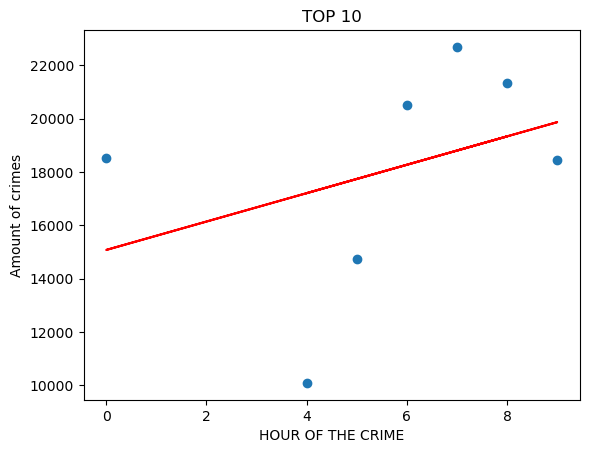

In [87]:

x_values=top_10["OCCURRED TO_time"]
y_values=top_10["UCR CRIME CATEGORY"]

#Calculate the correlation and print it
correlation = round(st.pearsonr(x_values, y_values)[0], 3)
print(f"The correlation between hour of the crime and the type of crime is {correlation}")

#Calculate the line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Create the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")

# Add labels
plt.title("TOP 10")
plt.xlabel("HOUR OF THE CRIME")
plt.ylabel("Amount of crimes")

#Show plot
plt.show()

In [37]:
grouped_crime_df=clean_crime_vs_time.groupby("UCR CRIME CATEGORY")
grouped_crime_df.head(10)

,UCR CRIME CATEGORY,OCCURRED TO_datetime,OCCURRED TO_date,OCCURRED TO_time
0,RAPE,2016-03-31 00:00:00,2016-03-31,1970-01-01 00:00:00.000000000
2,LARCENY-THEFT,2015-11-11 09:30:00,2015-11-11,1970-01-01 00:00:00.000000009
3,LARCENY-THEFT,2016-03-22 00:36:00,2016-03-22,1970-01-01 00:00:00.000000000
4,MOTOR VEHICLE THEFT,2016-01-09 00:00:00,2016-01-09,1970-01-01 00:00:00.000000000
5,DRUG OFFENSE,2015-11-01 15:21:00,2015-11-01,1970-01-01 00:00:00.000000015
...,...,...,...,...
4402,ARSON,2015-11-28 02:08:00,2015-11-28,1970-01-01 00:00:00.000000002
4443,MURDER AND NON-NEGLIGENT MANSLAUGHTER,2015-11-28 05:17:00,2015-11-28,1970-01-01 00:00:00.000000005
4582,MURDER AND NON-NEGLIGENT MANSLAUGHTER,2015-11-29 02:58:00,2015-11-29,1970-01-01 00:00:00.000000002
5226,MURDER AND NON-NEGLIGENT MANSLAUGHTER,2015-12-02 21:43:00,2015-12-02,1970-01-01 00:00:00.000000021


In [31]:
times = clean_crime_vs_time.groupby("UCR CRIME CATEGORY")["OCCURRED TO_time"].value_counts().sort_index()
times

UCR CRIME CATEGORY  OCCURRED TO_time             
AGGRAVATED ASSAULT  1970-01-01 00:00:00.000000000    1601
                    1970-01-01 00:00:00.000000001     829
                    1970-01-01 00:00:00.000000002     830
                    1970-01-01 00:00:00.000000003     688
                    1970-01-01 00:00:00.000000004     496
                                                     ... 
ROBBERY             1970-01-01 00:00:00.000000019     563
                    1970-01-01 00:00:00.000000020     584
                    1970-01-01 00:00:00.000000021     570
                    1970-01-01 00:00:00.000000022     489
                    1970-01-01 00:00:00.000000023     512
Name: count, Length: 216, dtype: int64

In [78]:
time_crime=pd.DataFrame(times)
time_crime

count
UCR CRIME CATEGORY OCCURRED TO_time                    
AGGRAVATED ASSAULT 1970-01-01 00:00:00.000000000   1601
                   1970-01-01 00:00:00.000000001    829
                   1970-01-01 00:00:00.000000002    830
                   1970-01-01 00:00:00.000000003    688
                   1970-01-01 00:00:00.000000004    496
...                                                 ...
ROBBERY            1970-01-01 00:00:00.000000019    563
                   1970-01-01 00:00:00.000000020    584
                   1970-01-01 00:00:00.000000021    570
                   1970-01-01 00:00:00.000000022    489
                   1970-01-01 00:00:00.000000023    512

[216 rows x 1 columns]

In [80]:
times = time_crime.groupby("UCR CRIME CATEGORY")["OCCURRED TO_time"].value_counts().reset_index()

crimes=['RAPE', 'LARCENY-THEFT', 'MOTOR VEHICLE THEFT', 'DRUG OFFENSE',
       'BURGLARY', 'AGGRAVATED ASSAULT',
       'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'ROBBERY', 'ARSON']

x_axis = np.arange(0, len(crimes))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Crime:Burglary 2015-2025")
plt.xlabel("HOURS")
plt.ylabel("Times of crime")

# plt.xlim(-0.75, len(crimes)-.25)
# plt.ylim(0, max(times) + 5)
plt.xticks(x_axis, [f"{i}:00" for i in x_axis], rotation=45)  # Formatting x-axis for hours
plt.xlim(-0.5, 23.5)  # Adjusting the limits to fit the full range of hours
plt.ylim(0, max(time.values) + 5)
plt.bar(x_axis, times.values, facecolor="red", align="center")
# plt.xticks(tick_locations, crimes)
plt.show()

KeyError: 'Column not found: OCCURRED TO_time'

In [24]:
#FRECUENCY IN HOUR OF CRIME "BURGLARY"
burglary_df = grouped_crime_df.get_group("BURGLARY")["OCCURRED TO_time"].value_counts().head(10)
burglary_df

OCCURRED TO_time
8     3561
7     3529
15    3141
6     3115
9     3104
12    3095
16    2993
10    2984
14    2955
17    2803
Name: count, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (24,) and (10,)

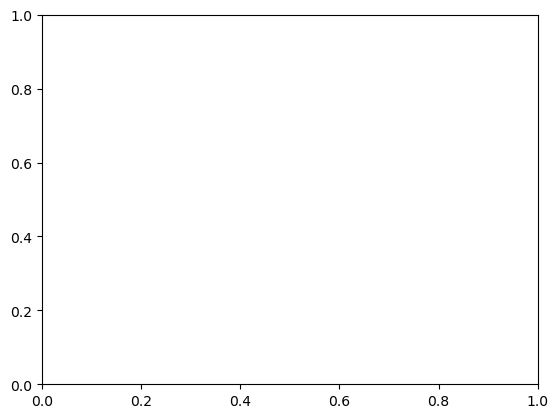

In [30]:
time = np.arange(0,24,1)
burglary, = plt.plot(time, burglary_df, color="blue", label="Burgary")
plt.title("Crime:Burglary 2015-2025")
plt.xlabel("HOURS")
plt.ylabel("Times of crime")
# plt.xlim(0,120)
# plt.ylim(5,95)
plt.grid()
plt.show()

In [112]:
x=clean_crime_vs_time[clean_crime_vs_time['UCR CRIME CATEGORY'] == 'RAPE'].value_counts()
rape_df=pd.DataFrame(x)
rape_df

count
UCR CRIME CATEGORY OCCURRED TO_datetime OCCURRED TO_date OCCURRED TO_time       
RAPE               2021-12-31 23:59:00  2021-12-31       23                   12
                   2020-12-31 00:00:00  2020-12-31       0                    10
                   2019-12-31 00:00:00  2019-12-31       0                    10
                   2017-12-31 00:00:00  2017-12-31       0                    10
                   2020-12-31 23:59:00  2020-12-31       23                   10
...                                                                          ...
                   2025-01-14 12:01:00  2025-01-14       12                    1
                   2025-01-15 00:00:00  2025-01-15       0                     1
                   2025-01-15 22:30:00  2025-01-15       22                    1
                   2025-01-16 00:00:00  2025-01-16       0                     1
                   2014-12-31 00:00:00  2014-12-31       0                     1

[5737 rows x 1 columns]

In [ ]:
# Linear regression on crimes and time
x_values=clean_crime_vs_time[clean_crime_vs_time['UCR CRIME CATEGORY'] == 'RAPE']
y_values=clean_crime_vs_time["OCCURRED TO_time"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('crime RAPE')
plt.ylabel("HOURS")

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title(f"Time vs. Crime(Rape)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()


ValueError: Cannot calculate a linear regression if all x values are identical

In [75]:
#looping for each crime
AGGRAVATED_ASSAULT=[]
ARSON=[]
BURGLARY=[]
DRUG_OFFENSE=[]

for crime, group in filtering("UCR CRIME CATEGORY"):
    if crime == "AGGRAVATED ASSAULT":
        AGGRAVATED_ASSAULT.append()
print(AGGRAVATED_ASSAULT)


TypeError: 'SeriesGroupBy' object is not callable